# String Function

Create a function that reverses a string. For example, given the string "forward", your function should return "drawrof". Assume all inputs are string

In [1]:
#define function
def rev_str(string):
    return string[::-1] #command to reverse string
        
#try function
rev_str('forward')

# Bayes Function

Complete the function below that can be used to calculate and return the posterior probability of an event A, given the known outcome of Event B using Bayes Theorem:

In [2]:
def bayes(a, b_given_a, b_given_not_a):

    """
    Calculates P(A | B) using bayes theorem.

    Args:
        a: P(A)
        b_given_a: P(B | A)
        b_given_not_a: P(B | ~A)

    Returns:
        P(A | B)
    """
    a_given_b = (b_given_a * a) /  b_given_not_a
    return a_given_b
  
bayes(.98, .005, 1.1)

# Lahman Baseball Records

Analyze the teams dataset from the Lahman baseball records. This dataset contains season statistics for each Major League Baseball team.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import randint
from numpy import mean
from scipy import stats

data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lahman-teams.csv')

Retreiving Information on columns, datatypes and any null entries

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          2805 non-null   int64  
 1   lgID            2755 non-null   object 
 2   teamID          2805 non-null   object 
 3   franchID        2805 non-null   object 
 4   divID           1288 non-null   object 
 5   Rank            2805 non-null   int64  
 6   G               2805 non-null   int64  
 7   Ghome           2406 non-null   float64
 8   W               2805 non-null   int64  
 9   L               2805 non-null   int64  
 10  DivWin          1260 non-null   object 
 11  WCWin           624 non-null    object 
 12  LgWin           2777 non-null   object 
 13  WSWin           2448 non-null   object 
 14  R               2805 non-null   int64  
 15  AB              2805 non-null   int64  
 16  H               2805 non-null   int64  
 17  2B              2805 non-null   i

Decribing the Dataset by retreving in Descriptive statistics information

In [5]:
data.describe()

,yearID,Rank,G,Ghome,W,L,R,AB,H,2B,...,HA,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF
count,2805.000000,2805.000000,2805.00000,2406.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,...,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2488.000000,2805.000000,2.526000e+03,2805.000000,2805.000000
mean,1955.036720,4.107308,150.34795,78.465919,74.749020,74.749020,681.945811,5142.492335,1346.273440,227.624955,...,1346.083779,101.136542,474.010695,731.229234,186.337255,140.186495,0.961519,1.344346e+06,100.199643,100.225668
std,41.519083,2.323414,23.22725,4.698684,17.640402,17.378079,135.738244,750.551691,219.891603,58.692602,...,219.521064,58.245002,131.890032,296.409881,107.657444,29.322764,0.030224,9.469316e+05,4.882215,4.814985
min,1871.000000,1.000000,6.00000,44.000000,0.000000,4.000000,24.000000,211.000000,33.000000,3.000000,...,49.000000,0.000000,0.000000,0.000000,47.000000,18.000000,0.760000,6.088000e+03,60.000000,60.000000
25%,1919.000000,2.000000,153.00000,77.000000,66.000000,65.000000,613.000000,5127.000000,1299.000000,193.000000,...,1288.000000,46.000000,427.000000,501.000000,116.000000,126.000000,0.960000,5.287162e+05,97.000000,97.000000
50%,1963.000000,4.000000,157.00000,81.000000,77.000000,76.000000,690.000000,5389.000000,1393.000000,231.000000,...,1392.000000,109.000000,494.000000,735.000000,145.000000,145.000000,0.970000,1.140348e+06,100.000000,100.000000
75%,1992.000000,6.000000,162.00000,81.000000,87.000000,87.000000,763.000000,5517.000000,1467.000000,270.000000,...,1470.000000,148.000000,555.000000,965.000000,217.000000,159.250000,0.980000,2.014687e+06,103.000000,103.000000
max,2015.000000,13.000000,165.00000,84.000000,116.000000,134.000000,1220.000000,5781.000000,1783.000000,376.000000,...,1993.000000,241.000000,827.000000,1450.000000,639.000000,217.000000,0.991000,4.483350e+06,129.000000,141.000000


a. For all records since 1995, plot histograms for the following variables. Which distribution do they appear to follow? Consider what each variable is measuring along with the histogram's shape.

Selecting observsations with records after 1995

In [6]:
data_1995 = data[data.yearID >= 1995]

 - Wins

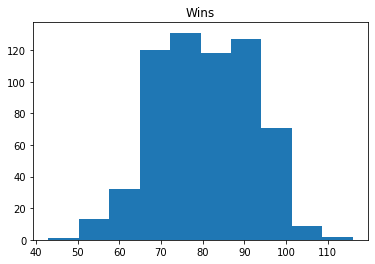

In [7]:
plt.hist(data_1995['W'])
plt.title('Wins')
plt.show()

The histogram seems to follow the Binomial Distribution

- Stolen bases per game

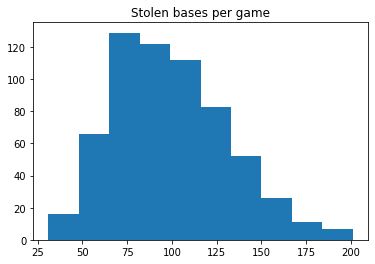

In [8]:
plt.hist(data_1995['SB'])
plt.title('Stolen bases per game')
plt.show()

The histogram seems to follow the Poisson Distribution

- Earned run average

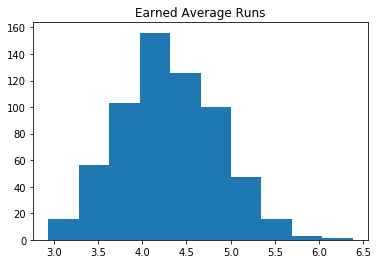

In [9]:
plt.hist(data_1995['ERA'])
plt.title('Earned Average Runs')
plt.show()

The histogram seems to follow the gamma distribution

# Correlation 

correlations between wins, stolen bases per game and earned after 1995 

In [10]:
#after 1995
data_1995[['W','SB','ERA']].corr()

,W,SB,ERA
W,1.000000,0.058896,-0.598455
SB,0.058896,1.000000,-0.020266
ERA,-0.598455,-0.020266,1.000000


In [11]:
import seaborn as sns

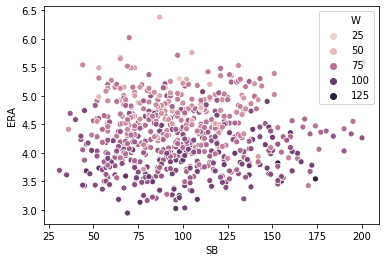

In [12]:
sns.scatterplot(x='SB', y='ERA', hue='W', data=data_1995)

Looking at the correlation, we see that the ability to win iw greater if the player can reduce their ERA or 'earned run average'

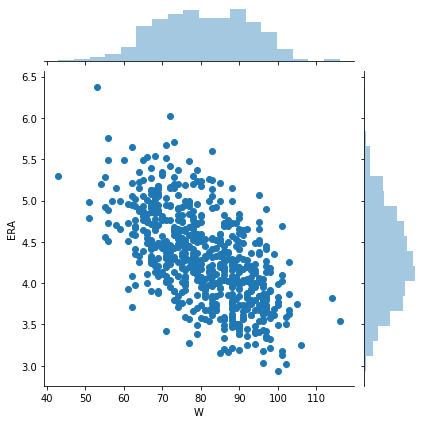

In [13]:
sns.jointplot(x="W", y="ERA", data=data_1995);

The joint plot valitates the first assumption of a negtive line by decreasing the era also increase chances of winning

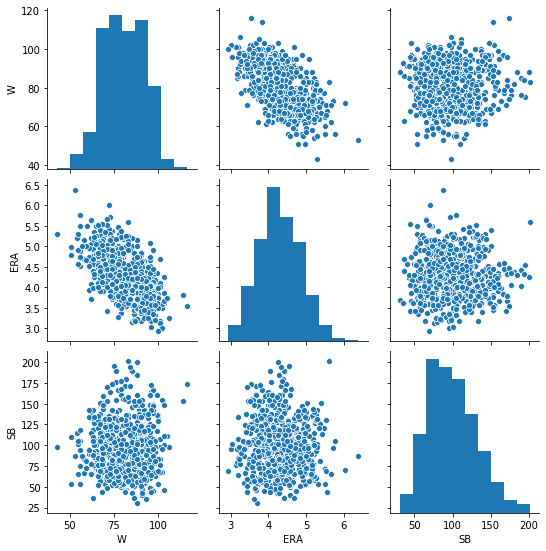

In [14]:
combined_data = data_1995[['W','ERA','SB']]
sns.pairplot(combined_data)

# Choose any 2 variables

choose any two of the variables from 3. Draw 1,000 samples, taking the mean of 100 observations each time. Plot the frequencies of the sample means. What distribution does this appear to follow?
Hint: df['col'].sample(n=50) will draw 50 random observations from df['col'].

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          2805 non-null   int64  
 1   lgID            2755 non-null   object 
 2   teamID          2805 non-null   object 
 3   franchID        2805 non-null   object 
 4   divID           1288 non-null   object 
 5   Rank            2805 non-null   int64  
 6   G               2805 non-null   int64  
 7   Ghome           2406 non-null   float64
 8   W               2805 non-null   int64  
 9   L               2805 non-null   int64  
 10  DivWin          1260 non-null   object 
 11  WCWin           624 non-null    object 
 12  LgWin           2777 non-null   object 
 13  WSWin           2448 non-null   object 
 14  R               2805 non-null   int64  
 15  AB              2805 non-null   int64  
 16  H               2805 non-null   int64  
 17  2B              2805 non-null   i

# Selecting Earned Run Average or 'ERA' 

Drawing 1000 samples from the ERA column and identifying if any null values are present

In [16]:
#Drawing 1000 sample
sample_ERA = data['ERA'].sample(n=1000)

#Identifying Null values
sample_ERA.isnull().sum()

0

Viewing what the data looks like

In [17]:
print(sample_ERA)

1295    3.46
1802    3.58
2560    4.65
1744    3.63
327     3.67
        ... 
1493    3.74
258     3.56
1298    3.35
1472    3.57
681     3.22
Name: ERA, Length: 1000, dtype: float64


Creating a new list consisting of the means of 100 samples coming from the dataset sample_ERA

In [18]:
df_ERA = []

for x in sample_ERA:
    era_ = sample_ERA.sample(n=100).mean()
    #era_ = np.random.randint(x, size=100).mean()
    df_ERA.append(era_)

Plotting the histgram of the means collected randomly and added to df_ERA

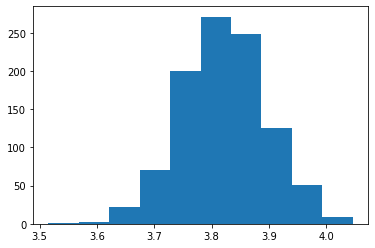

In [19]:
plt.hist(df_ERA)
plt.show()

# Selecting stolen bases or 'SB' 

Identifying any null values present in the dataset

In [20]:
data['SB'].isnull().sum()

144

Set null value to 0 assuming players does not have any record of stolen basis. This can attributed to their performance of not being able to.

In [21]:
fill_sb_null = data.fillna(value=0)

Checking if any more null values exist after re-assignment

In [22]:
sample_SB = fill_sb_null['SB'].sample(n=1000)
sample_SB.isna().sum()

0

Viewing what the data looks like

In [23]:
print(sample_SB)

381     174.0
2388    110.0
169       0.0
1102    127.0
750      94.0
        ...  
1469     67.0
1665    101.0
2382    115.0
1316     50.0
1739     83.0
Name: SB, Length: 1000, dtype: float64


Creating a new list consisting of the means of 100 samples coming from the dataset sample_SB

In [24]:
df_SB = []

for x in sample_SB:
    sb_ = sample_SB.sample(n=100).mean()
    df_SB.append(sb_)

df_SB

[107.48,
 112.38,
 104.4,
 110.19,
 104.44,
 110.83,
 101.28,
 96.28,
 104.8,
 108.18,
 102.44,
 122.01,
 99.6,
 101.28,
 113.67,
 99.13,
 108.87,
 108.97,
 110.14,
 110.05,
 108.77,
 98.8,
 111.67,
 106.97,
 106.36,
 113.61,
 101.61,
 90.64,
 114.36,
 112.74,
 103.56,
 102.2,
 100.91,
 87.36,
 108.7,
 99.56,
 103.43,
 100.03,
 110.35,
 111.75,
 108.27,
 100.02,
 118.27,
 120.57,
 110.79,
 103.83,
 106.07,
 103.64,
 116.63,
 110.52,
 107.35,
 99.99,
 100.67,
 118.68,
 109.74,
 105.53,
 105.93,
 101.36,
 112.0,
 102.34,
 110.15,
 107.09,
 103.09,
 103.04,
 101.29,
 103.19,
 111.34,
 103.84,
 103.69,
 108.89,
 105.09,
 104.14,
 95.03,
 98.25,
 110.6,
 107.69,
 102.58,
 111.32,
 108.04,
 107.15,
 113.46,
 106.26,
 109.46,
 108.24,
 102.57,
 99.47,
 111.71,
 113.87,
 108.15,
 95.94,
 111.07,
 107.86,
 103.62,
 104.45,
 107.2,
 108.2,
 109.49,
 108.02,
 105.2,
 113.2,
 99.71,
 113.88,
 115.65,
 98.58,
 102.59,
 106.41,
 97.49,
 111.09,
 105.4,
 98.93,
 95.94,
 116.77,
 116.47,
 96.71,
 105.

Plotting the histgram of the means collected randomly and added to df_SB

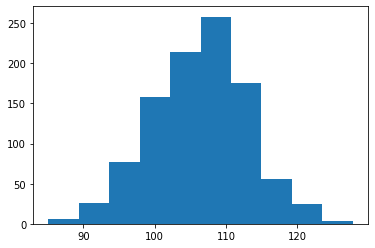

In [25]:
plt.hist(df_SB)
plt.show()

Gamma Distribution

In [26]:
print(sample_SB)

381     174.0
2388    110.0
169       0.0
1102    127.0
750      94.0
        ...  
1469     67.0
1665    101.0
2382    115.0
1316     50.0
1739     83.0
Name: SB, Length: 1000, dtype: float64


Both 'Stolen Bases' and 'Earned Run Average' seems to follow the Normal Distribution.